In [19]:
import pandas as pd
import random
import numpy as np


# Task 1

Model: y = ax + b

Approach: Gradient Descent

In [20]:

class Model():
    def __init__(self, parameter1, parameter2, learning_rate):
        self.parameter1 = parameter1
        self.parameter2 = parameter2
        self.lr = learning_rate
    
    def function(self, x):
        return self.parameter1 * x + self.parameter2
    
    def calculate_gradient(self,input,target,temp1,temp2,error):
        for index in range(len(input)):
            temp1 += (self.function(input[index]) - target[index]) * input[index]
            temp2 += (self.function(input[index]) - target[index])
            error += (self.function(input[index]) - target[index]) ** 2  # Calculate MSE

        gradient1 = temp1 / len(input)
        gradient2 = temp2 / len(input)
        mse_error = error / (2 * len(input))

        return gradient1,gradient2,mse_error
    
    def train(self, input, target, iterates):
        flag = 0
        first_zero_iterate = 0
        
        for iterate in range(iterates):
            temp1 = 0
            temp2 = 0
            error = 0  
            gradient1,gradient2,mse_error=self.calculate_gradient(input,target,temp1,temp2,error)

            #parameter update
            self.parameter1 -= self.lr * gradient1
            self.parameter2 -= self.lr * gradient2

            print(f"{iterate} parameter1: {self.parameter1:.2f}, parameter2: {self.parameter2:.2f}, MSE_error: {mse_error:.2f}, Gradient1: {gradient1}, Gradient2: {gradient2}")


            #Findout first iterate about gradients are similar with 0
            if gradient1 < 1 and gradient2 < 1 and flag == 0:
                flag = 1
                first_zero_iterate = iterate
        return self.parameter1, self.parameter2, mse_error, first_zero_iterate
    
    def mini_batch_train(self, input, target, epochs, batch_size, first_zero_iterate):
        iterate = 0
        flag = 0
        
        for epoch in range(epochs):
            for _ in range(len(input) // batch_size):
                # Randomly select a batch from the input and target data
                indices = np.random.choice(len(input), size=batch_size, replace=False)
                batch_x = input[indices]
                batch_y = target[indices]

                temp1 = 0
                temp2 = 0
                error = 0  

                gradient1,gradient2,mse_error=self.calculate_gradient(batch_x,batch_y,temp1,temp2,error)

                #Parameter update
                self.parameter1 -= self.lr * gradient1
                self.parameter2 -= self.lr * gradient2

                print(f"{iterate} parameter1: {self.parameter1:.2f}, parameter2: {self.parameter2:.2f}, MSE_error: {mse_error:.2f}, Gradient1: {gradient1}, Gradient2: {gradient2}")

                
                if (gradient1 < 1 and gradient2 < 1) and flag == 0:
                    flag = 1
                    first_zero_iterate = iterate
                iterate += 1
        return self.parameter1, self.parameter2, mse_error, first_zero_iterate


In [21]:
df=pd.read_csv("data_hw1.csv")

x = df['x'].values
y = df['y'].values

# Initialize parameters with small random values close to zero
a = random.uniform(-0.1, 0.1)
b = random.uniform(-0.1, 0.1)

print(f'initial parameters are {a,b}')

lr = 0.01  # Initialize the learning rate

initial parameters are (-0.035607685343363824, -0.00492115780111653)


# Batch Model
Batch 모델을 데이터를 전부 error를 계산하여 한번에 연산하는 방식이다.

## 변수

- first_zero_iterate
> gradient 값이 0에 수렴하는 조건으로 반복을 진행하는데 여기서 batch와 mini-batch 간의 차이를 알아보기 위해서 추가하였다.

- iterate
> 반복 횟수를 말한다. Iterate(실행 횟수) 는 1000번으로 맞췄고 이후 나오는 모델들도 1000번과 비슷하게 연산 횟수를 맞춰주었다.



In [22]:
model = Model(a, b, lr)

iterates=1000

parameter1,parameter2,error,first_zero_iterate=model.train(x, y,iterates)


print()
print('------------------------train finish ---------------------------')
print(f'first zero iterate: {first_zero_iterate}, final parameter a : {model.parameter1}, final parameter b : {model.parameter2}')

0 parameter1: -0.22, parameter2: 0.03, MSE_error: 128.82, Gradient1: 18.91297888134145, Gradient2: -3.0405412212055465
1 parameter1: -0.41, parameter2: 0.05, MSE_error: 125.19, Gradient1: 18.469139884417864, Gradient2: -2.832176053097458
2 parameter1: -0.59, parameter2: 0.08, MSE_error: 121.74, Gradient1: 18.037005843461394, Gradient2: -2.6300707946806416
3 parameter1: -0.77, parameter2: 0.10, MSE_error: 118.46, Gradient1: 17.61626087734649, Gradient2: -2.4340527102625713
4 parameter1: -0.94, parameter2: 0.13, MSE_error: 115.34, Gradient1: 17.206597665371138, Gradient2: -2.243953763759067
5 parameter1: -1.11, parameter2: 0.15, MSE_error: 112.36, Gradient1: 16.807717215094712, Gradient2: -2.0596104911497433
6 parameter1: -1.27, parameter2: 0.17, MSE_error: 109.53, Gradient1: 16.41932863647275, Gradient2: -1.8808638763934682
7 parameter1: -1.43, parameter2: 0.18, MSE_error: 106.83, Gradient1: 16.041148922118364, Gradient2: -1.7075592307098566
8 parameter1: -1.59, parameter2: 0.20, MSE_er

# Mini-Batch
minit-batch 모델을 전체 데이터로 error를 구하는게 아니라 일정 데이터를 분할하여 학습을 진행한다.

## 변수

- first_zero_iterate
> gradient 값이 0에 수렴하는 조건으로 반복을 진행하는데 여기서 batch와 mini-batch 간의 차이를 알아보기 위해서 추가하였다.

- epoch
> 프로세스의 반복 횟수를 말하며 mini-batch 모델에서는 batch size 로 데이터를 작게 나눠서 학습을 진행함으로 전체적인 프로세스 횟수로 학습을 반복한다.

- batch_size
> batch_size 데이터를 분할하여 학습을 진행을 할때 분할하는 데이터의 사이즈를 지정하는 변수이다.



In [23]:
batch_model = Model(a, b, lr)

epoch=32
batch_size=32

parameter1,parameter2,error,first_zero_iterate=batch_model.mini_batch_train(x, y,epoch,batch_size,first_zero_iterate)

print()
print('------------------------ train finish ---------------------------')
print(f'first zero iterate: {first_zero_iterate}, final parameter a : {batch_model.parameter1}, final parameter b : {batch_model.parameter2}')

0 parameter1: -0.14, parameter2: -0.03, MSE_error: 78.18, Gradient1: 10.038068545680494, Gradient2: 2.5869707027264686
1 parameter1: -0.46, parameter2: 0.05, MSE_error: 214.76, Gradient1: 32.209838604406784, Gradient2: -8.41754176895167
2 parameter1: -0.59, parameter2: 0.06, MSE_error: 82.70, Gradient1: 12.991804512198708, Gradient2: -0.7821567891742621
3 parameter1: -0.70, parameter2: 0.07, MSE_error: 76.05, Gradient1: 11.086728069351185, Gradient2: -0.527037003506204
4 parameter1: -0.84, parameter2: 0.08, MSE_error: 98.36, Gradient1: 14.186138796977742, Gradient2: -1.3708113918248885
5 parameter1: -0.96, parameter2: 0.08, MSE_error: 88.86, Gradient1: 12.200430174310403, Gradient2: 0.07370716120293552
6 parameter1: -1.11, parameter2: 0.09, MSE_error: 99.74, Gradient1: 14.247418137224003, Gradient2: -0.5833089540528849
7 parameter1: -1.27, parameter2: 0.10, MSE_error: 115.47, Gradient1: 16.719431146809992, Gradient2: -1.8230609411049925
8 parameter1: -1.41, parameter2: 0.12, MSE_error:

# Library
직접 구현한 모델과 기존 알고리즘을 비교하기 위해서 scikit-learn 라이브러리에서 제공하는 기본 LinearRegression 라이브러리를 사용하였다.

In [24]:
from sklearn.linear_model import LinearRegression

libary_model=LinearRegression(n_jobs=1000)# similar iteration numbers with batch, mini-batch model
libary_model.fit(x.reshape(-1, 1),y.reshape(-1, 1))
coefficients = libary_model.coef_
intercept = libary_model.intercept_


print()
print('------------------------ train finish ---------------------------')
print(f'final parameter a : {coefficients[0][0]}, final parameter b : {intercept[0]}')


------------------------ train finish ---------------------------
final parameter a : -12.288069059882877, final parameter b : -8.493209154977967


# library model

Scikit-learn Model Result is
-12.288069059882877 * x + -8.493209154977967


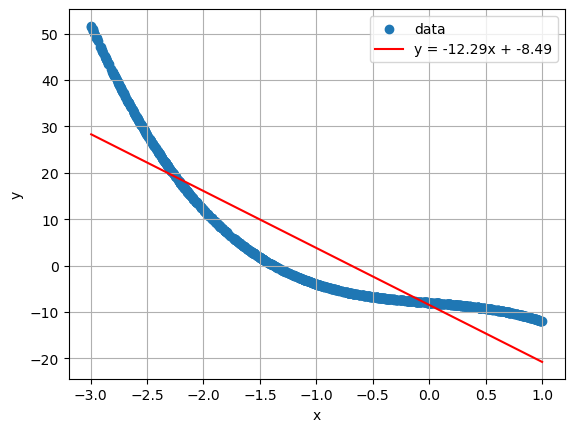

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
x_data = x
y_data = y

# 방정식의 계수
a = coefficients[0][0]
b = intercept[0]
print("Scikit-learn Model Result is")
print(f"{a} * x + {b}")
# x 범위 설정 (원하는 범위로 설정해도 됩니다)
x_range = np.linspace(min(x_data), max(x_data), 100)

# 방정식을 사용하여 y 값 계산
y_range = a * x_range + b

# 데이터 점 그래프 표시
plt.scatter(x_data, y_data, label='data')

# 방정식 그래프 표시
plt.plot(x_range, y_range, color='red', label=f'y = {a:.2f}x + {b:.2f}')

# 그래프에 레이블과 범례 추가
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()


# Batch

Batch Model Result is
-12.237358415581625 * x + -8.400917342100932


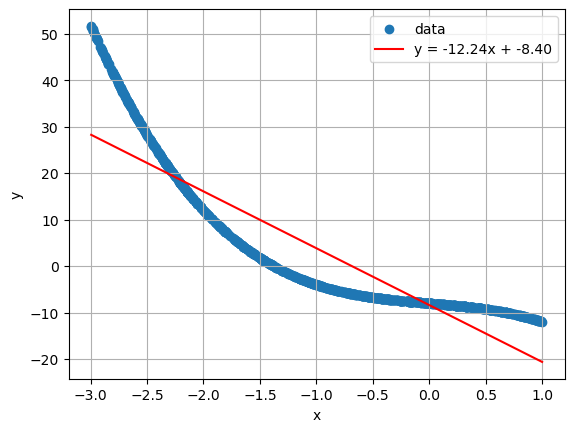

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
x_data = x
y_data = y

# 방정식의 계수
a = model.parameter1
b = model.parameter2
print("Batch Model Result is")
print(f"{a} * x + {b}")
# x 범위 설정 (원하는 범위로 설정해도 됩니다)
x_range = np.linspace(min(x_data), max(x_data), 100)

# 방정식을 사용하여 y 값 계산
y_range = a * x_range + b

# 데이터 점 그래프 표시
plt.scatter(x_data, y_data, label='data')

# 방정식 그래프 표시
plt.plot(x_range, y_range, color='red', label=f'y = {a:.2f}x + {b:.2f}')

# 그래프에 레이블과 범례 추가
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()


# mini-batch

Mini-Batch Model Result is
-12.347887587226893 * x + -8.42302758924109


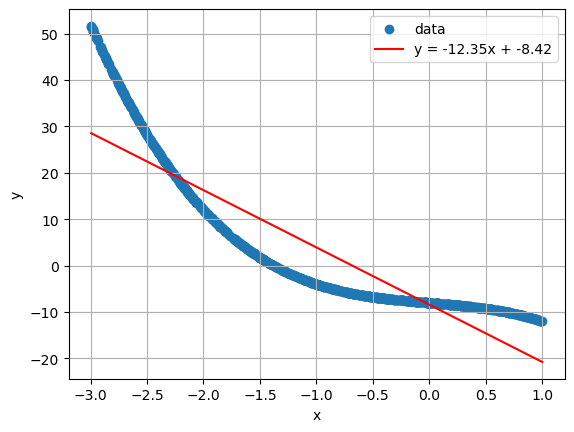

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
x_data = x
y_data = y

# 방정식의 계수
a = batch_model.parameter1
b = batch_model.parameter2
print("Mini-Batch Model Result is")
print(f"{a} * x + {b}")
# x 범위 설정 (원하는 범위로 설정해도 됩니다)
x_range = np.linspace(min(x_data), max(x_data), 100)

# 방정식을 사용하여 y 값 계산
y_range = a * x_range + b

# 데이터 점 그래프 표시
plt.scatter(x_data, y_data, label='data')

# 방정식 그래프 표시
plt.plot(x_range, y_range, color='red', label=f'y = {a:.2f}x + {b:.2f}')

# 그래프에 레이블과 범례 추가
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()


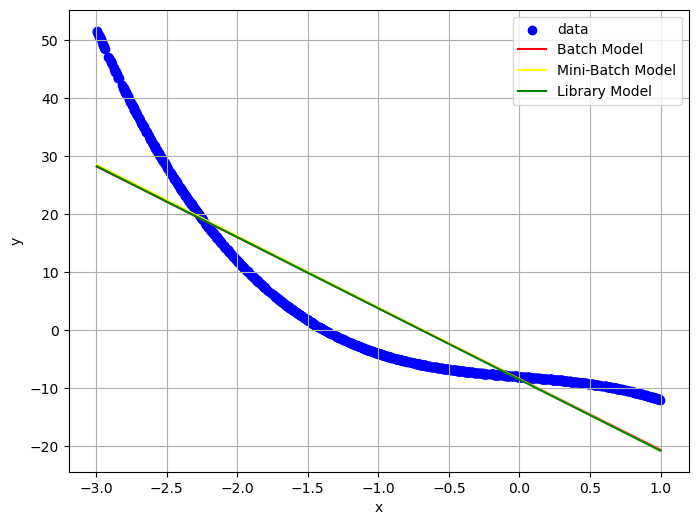

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data, coefficients, and intercepts for three different cases
x_data = x
y_data = y

coefficients_list = [model.parameter1, batch_model.parameter1, coefficients[0][0]]
intercepts_list = [model.parameter2, batch_model.parameter2, intercept[0]]
labels = ['Batch Model','Mini-Batch Model','Library Model']
colors = ['red', 'yellow', 'green']  # You can specify different colors here

# Create a single plot
plt.figure(figsize=(8, 6))

# Plot data points in black
plt.scatter(x_data, y_data, color='blue', label='data')

# Loop through the different cases and plot them on the same graph
for i in range(len(coefficients_list)):
    a = coefficients_list[i]
    b = intercepts_list[i]
    label = labels[i]
    
    x_range = np.linspace(min(x_data), max(x_data), 100)
    y_range = a * x_range + b

    plt.plot(x_range, y_range, color=colors[i], label=label)

# Add labels, legends, and grid
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Show the single plot
plt.show()


# Task 2

Model: y = ax2 + bx + c

Approach: Normal Equation

In [29]:
import numpy as np


x = df['x'].values
y = df['y'].values


X = np.array([])  # initialize empty NumPy array

for input in x:
    X = np.append(X, [1, input, input**2])  # Append  [1, input, input**2] array in X

# Reshape X numpy array to 2D matrix
X = X.reshape(len(x), 3)


theta = np.linalg.inv(X.T @ X) @ X.T @ y



print(theta)
class Model2():
    def __init__(self, parameters):
        self.parameters = parameters
    
    def function(self, x):
        c, b, a = self.parameters
        return a * x**2 + b * x + c

model2 = Model2(theta)

print('Normal Equation model parameters')
print(f'parameter a : {theta[2]}')
print(f'parameter b : {theta[1]}')
print(f'parameter c : {theta[0]}')


[-10.70482255  -1.05708197   5.82074893]
Normal Equation model parameters
parameter a : 5.820748931582738
parameter b : -1.057081967923174
parameter c : -10.704822547454354


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성 생성
degree = 2  # 다항식의 차수 설정
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))

# 다항 회귀 모델 훈련
libray_model = LinearRegression()
libray_model.fit(X_poly, y)


# 회귀 결과 출력
print('Library Normal Equation model parameters')
print(f'parameter a : {libray_model.coef_[2]}')
print(f'parameter b : {libray_model.coef_[1]}')
print(f'parameter c : {libray_model.intercept_}')


Library Normal Equation model parameters
parameter a : 5.820748931582735
parameter b : -1.0570819679231742
parameter c : -10.704822547454368


Model2 Result is 
5.820748931582738*x^2 + -1.057081967923174*x + -10.704822547454354


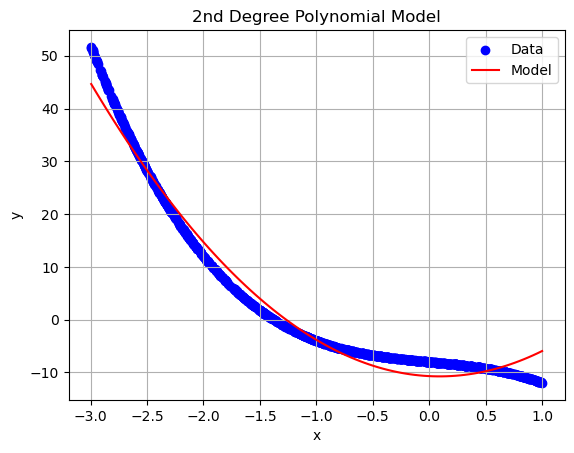

In [31]:
import matplotlib.pyplot as plt
print("Model2 Result is ")

print(f"{model2.parameters[2]}*x^2 + {model2.parameters[1]}*x + {model2.parameters[0]}")
# Assuming df is your DataFrame with columns 'x' and 'y'
x_data = df['x'].values
y_data = df['y'].values

# Generate x values for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = [model2.function(x) for x in x_plot]

# Plot the data points
plt.scatter(x_data, y_data, label='Data', color='blue')

# Plot the model curve
plt.plot(x_plot, y_plot, label='Model', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('2nd Degree Polynomial Model')
plt.grid(True)
plt.show()


Scikit-learn model Result is 
5.820748931582735*x^2 + -1.0570819679231742*x + -10.704822547454368


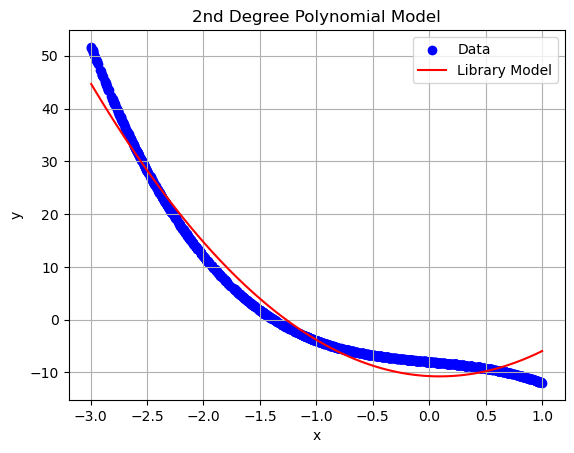

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with columns 'x' and 'y'
x_data = df['x'].values
y_data = df['y'].values

# Generate x values for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)

# Create polynomial features for library_model
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x_data.reshape(-1, 1))

# Train the library model
libray_model = LinearRegression()
libray_model.fit(X_poly, y_data)

# Calculate y values for library_model
y_plot_libray_model = libray_model.intercept_ + libray_model.coef_[1] * x_plot + libray_model.coef_[2] * x_plot**2

print('Scikit-learn model Result is ')
print(f"{libray_model.coef_[2]}*x^2 + {libray_model.coef_[1]}*x + {libray_model.intercept_}")
# Plot the data points
plt.scatter(x_data, y_data, label='Data', color='blue')
# Plot the library_model curve in green
plt.plot(x_plot, y_plot_libray_model, label='Library Model', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('2nd Degree Polynomial Model')
plt.grid(True)
plt.show()


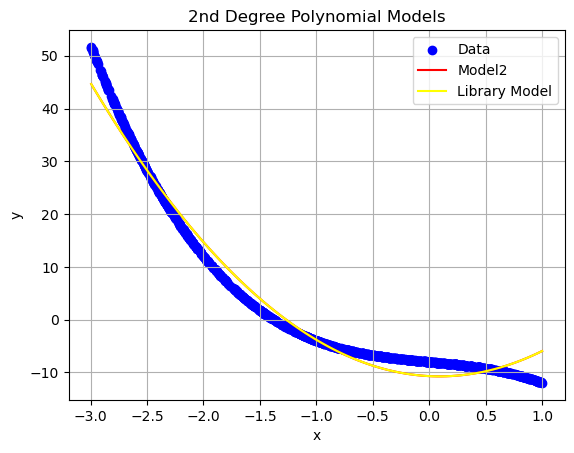

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming df is your DataFrame with columns 'x' and 'y'
x_data = df['x'].values
y_data = df['y'].values

# Generate x values for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)

# Calculate y values for model2
y_plot_model2 = [model2.function(x) for x in x_plot]

# Create polynomial features for library_model
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x_data.reshape(-1, 1))

# Train the library model
libray_model = LinearRegression()
libray_model.fit(X_poly, y_data)

# Calculate y values for library_model
y_plot_libray_model = libray_model.intercept_ + libray_model.coef_[1] * x_plot + libray_model.coef_[2] * x_plot**2

# Plot the data points
plt.scatter(x_data, y_data, label='Data', color='blue')

# Plot the model2 curve in red
plt.plot(x_plot, y_plot_model2, label='Model2', color='red')

# Plot the library_model curve in green
plt.plot(x_plot, y_plot_libray_model, label='Library Model', color='yellow')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('2nd Degree Polynomial Models')
plt.grid(True)
plt.show()
